Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Connor McDonald"
StudentNumber = "u16040725"

---

# MIT 804 2021: Homework 3, part 5 [25 points]
## Swarm Intelligence

**You will learn how to:**
- Look at swarm intelligence
- Understand the effect of parameters on performance

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1 The particle

Given that we need to have multiple particles, we will first start with a simple particle. For this part of the homework the full particle is defined for you in a [Python Class](https://docs.python.org/3/tutorial/classes.html). As such you need to just look at the lecture notes from lecture 3 to understand how this particle is constructed as well as the major procedures such as **velocity** and **position** updates. 

See the Scholarpedia article on PSO - [http://www.scholarpedia.org/article/Particle_swarm_optimization](http://www.scholarpedia.org/article/Particle_swarm_optimization)

In [3]:
class Particle:
    def __init__(self, num_dim, w =0.1, phi_p  = 0.1, phi_g  = 0.1):
        """
        Initialising what is happening in the particle. See https://en.wikipedia.org/wiki/Particle_swarm_optimization 
        or http://www.scholarpedia.org/article/Particle_swarm_optimization
        """
        self.position = self.initialise_position(num_dim=num_dim)
        self.velocity = 0.1*self.initialise_position(num_dim=num_dim)
        self.position_best = []       
        self.error_best = []     
        self.error = []  
        self.w = w
        self.phi_p = phi_p 
        self.phi_g = phi_g 
        self.num_dim = num_dim

    def initialise_position(self, num_dim, limit = 10):
        """
        Returns a random initialisation of the position of the particle
        """
        X = np.random.uniform(-1*limit,limit,size=num_dim)
        return X
    
    def calculate_fitness(self, evaluation_function):
        """
        Evaluates the fitness function at the particles current position
        """
        self.error = evaluation_function(self.position)
        if self.error > self.error_best or self.error_best == []:
            self.position_best = self.position
            self.error_best = self.error

    def update_velocity(self, position_best_swarm):
        """
        Calculates the new velocity of the particle given its current best in its memory, 
        what the best in the swarm is and what its current update should be
        """
        for i in range(self.num_dim):
            r1 = np.random.random()
            r2 = np.random.random()
            # Q1 update equation. http://www.scholarpedia.org/article/Particle_swarm_optimization
            velocity_own_best = self.phi_p*r1*(self.position_best[i] - self.position[i])
            velocity_group_best = self.phi_g*r2*(position_best_swarm[i] - self.position[i])
            self.velocity[i] = self.w*self.velocity[i] + velocity_own_best +  velocity_group_best

    def update_position(self):
        """
        Updates the position of the particle given the velocity
        """
        self.position = self.position + self.velocity

Look at Q1 above , what happens when. You do not need to run the algorithm. you just have to write how the algorithm changes if you make these changes:
1. You set self.phi_p = 0 [1 point]
2. You set self.phi_p and self.phi_g = 0 [2 points]
3. You set self.w = 0 [1 point]

1. The velocity of each particle would only be determined by its own momentum and the location of the swarms best position, this would create faster convergence but may cause the algorithm to get stuck on local extrema as the search range is reduced.

2. The velocity of each particle would only be determined by its initial momentum and the particles never change direction, they would only change the speed in which they travel in this intial direction due to the random components. There would be no convergence of particles and the variance of optimal points between each run would be high as particle movement is essentially random.

3. The particles' velocity would not make use of the particles' momentum, this would cause faster convergence, however the search range would shrink, this may lead to settling on local extrema. 

# 2 Fitness Functions

We revisit fitness functions that should look familiar. 

In [4]:
def fitness_function_2d(X):
    output = -1.0*(X[0]**2 + X[1]**2) # np.square(x)
    return output

def fitness_function_noisy(X):
    x1 = X[0]
    x2 = X[1]
    output = np.exp(np.sin(50.0*x1)) + np.sin(60*np.exp(x2)) + np.sin(70.0*np.sin(x1)) + np.sin(np.sin(80.0*x2)) - np.sin(10.0*(x1+x2))+0.25*(x1**2 + x2**2)
    return -1.0*output

# Main PSO + Observations [20 Marks]

In this section you are asked to run the PSO and also observe the behaviour of the algorithm under different parameters. It is assumed that you have succesfully implemented similar functions for the other optimisation problems in the homework and as such this section is for you to understand how parameters impact the performance of the algorithm.

In the next cell, note Q1, Q2, Q3 and answer them in the cell after. 

In [5]:
def run_PSO(num_dim, fitness_function, num_particles = 10, max_iterations = 10, 
            w =0.1, phi_p  = 0.1, phi_g  = 0.1):
    """
    Runs the PSO algorithm. It has a few parameters that can be set.
    """    
    best_swarm_fitness_value = []
    best_swarm_position = []     
    best_swarm_fitness_value_history = []
    average_swarm_fitness= []
    std_swarm_fitness= []
    # Create the Swarm
    swarm=[]
    for i in range(num_particles):
        swarm.append(Particle(num_dim, w =w, phi_p  = phi_p, phi_g  = phi_g))
    
    # Run the algorithm
    for i in range(max_iterations):
        
        
        swarm_error_tally = []
        ## Q2.2: What does this outer loop do? [2 points]
        for j in range(num_particles):
            swarm[j].calculate_fitness(fitness_function)
            ## Q2.1: What does this inner loop do? [2 points]
            if swarm[j].error > best_swarm_fitness_value or best_swarm_fitness_value == []:
                best_swarm_position = swarm[j].position.copy()
                best_swarm_fitness_value = swarm[j].error
                best_swarm_fitness_value_history.append(best_swarm_fitness_value)
            swarm_error_tally.append(swarm[j].error)
        average_swarm_fitness.append(np.mean(swarm_error_tally))
        std_swarm_fitness.append(np.std(swarm_error_tally))
        
        ## Q2.3 What does this loop do? [2 points]
        for j in range(num_particles):
            swarm[j].update_velocity(best_swarm_position)
            swarm[j].update_position()
            
    return best_swarm_position, average_swarm_fitness, std_swarm_fitness, best_swarm_fitness_value_history

## Please answer Q2.1, Q2.2 and Q2.3 in this cell. 
2.1) This inner loop calculates the fitness of each particle and compares it to the previous best fitness, if the particle is more fit than the previous best then it updates the best fitness value and the position of that best fitness value, whilst also adding the fitness value to a list of previous fitness values for comparison purposes.

2.2) This outer loop ensures that the algorthim terminates after a certain number of iterations as it may take excessively long to converge on a single point due to the momentum component causing particles to overshoot slightly. In most cases, at least one of the particles would have gotten close enough to the optimal point to in the set number of iterations to produce an acceptable point, and so we do not need to wait for total convergence. 

2.3) This loop updates the velocity of each particle based on the best position the swarm has found so far, it then uses this new velocity to calculate the position of each particle after the current iteration has completed.

### 2D Fitness Function with PSO

In [6]:
num_dim = 2
num_particles = 10
max_iterations = 100
w =0.1
phi_p  = 2
phi_g  = 0.1
best_swarm_position_2D, average_swarm_fitness_2D,std_swarm_fitness_2D, best_swarm_fitness_value_history_2D = run_PSO(num_dim,fitness_function_2d, 
                                                                num_particles=num_particles, 
                                                                max_iterations=max_iterations,
                                                                w =w, phi_p  = phi_p, phi_g  = phi_g)

<ipython-input-3-c94a5656939f>:29: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if self.error > self.error_best or self.error_best == []:
<ipython-input-5-0c49b5f7f29c>:25: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if swarm[j].error > best_swarm_fitness_value or best_swarm_fitness_value == []:


Text(0.5, 1.0, 'History of best_fitness_value saves - 2D')

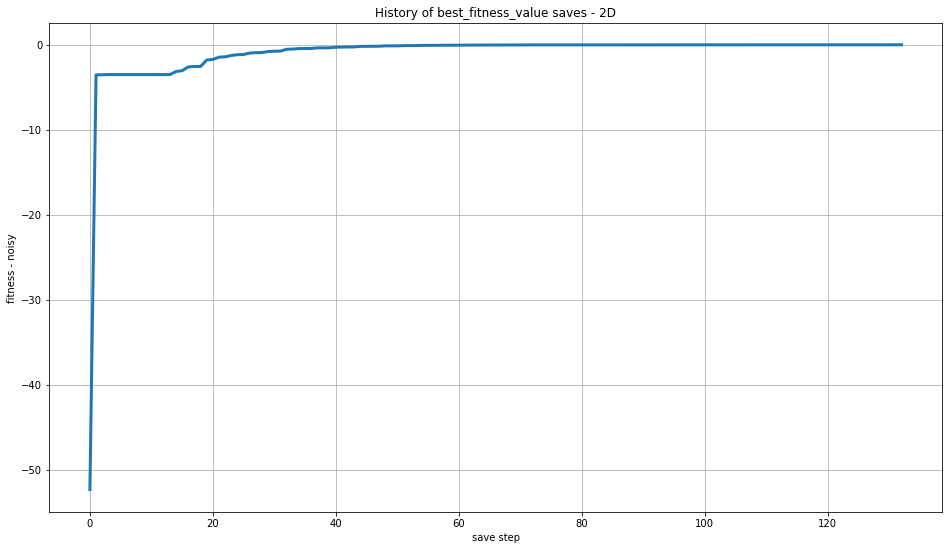

In [7]:
plt.figure(figsize=(16,9)) # Set the figure size
plt.plot(best_swarm_fitness_value_history_2D,linewidth=3)
plt.grid()
# Label the plot
plt.xlabel("save step")
plt.ylabel("fitness - noisy")
plt.title("History of best_fitness_value saves - 2D")

Text(0.5, 1.0, 'History of average fitness across the whole swarm - 2D')

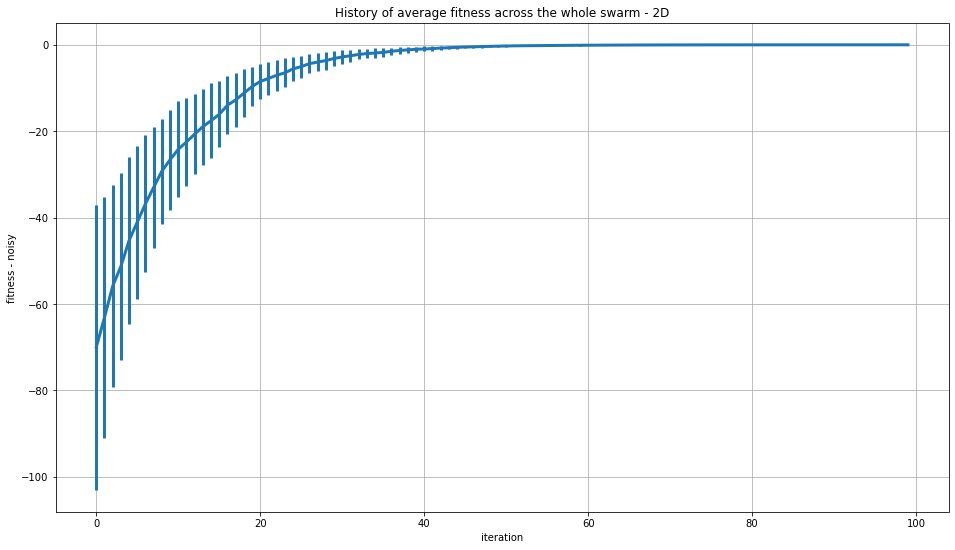

In [8]:
plt.figure(figsize=(16,9)) # Set the figure size
x = np.arange(max_iterations)
plt.errorbar(x,average_swarm_fitness_2D,yerr=std_swarm_fitness_2D, linewidth=3)
plt.grid()
# Label the plot
plt.xlabel("iteration")
plt.ylabel("fitness - noisy")
plt.title("History of average fitness across the whole swarm - 2D")

### Noisy Fitness Function with PSO

In [9]:
num_dim = 2
num_particles = 20
max_iterations = 100

# Q3.2, You will experiment here with these values
w =0.2
phi_p  = 1.5
phi_g  = 1.5
best_swarm_position, average_swarm_fitness, std_swarm_fitness, best_swarm_fitness_value_history = run_PSO(num_dim,fitness_function_noisy, 
                                                                num_particles=num_particles, 
                                                                max_iterations=max_iterations,
                                                                w =w, phi_p  = phi_p, phi_g  = phi_g)

<ipython-input-3-c94a5656939f>:29: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if self.error > self.error_best or self.error_best == []:
<ipython-input-5-0c49b5f7f29c>:25: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if swarm[j].error > best_swarm_fitness_value or best_swarm_fitness_value == []:


**Note** above that for Q3.2v(below) you will experiment in the box above and look at the plot changes below.

### Best Fitness Values for Noisy Fitness Function with PSO

Text(0.5, 1.0, 'History of best_fitness_value saves - noisy')

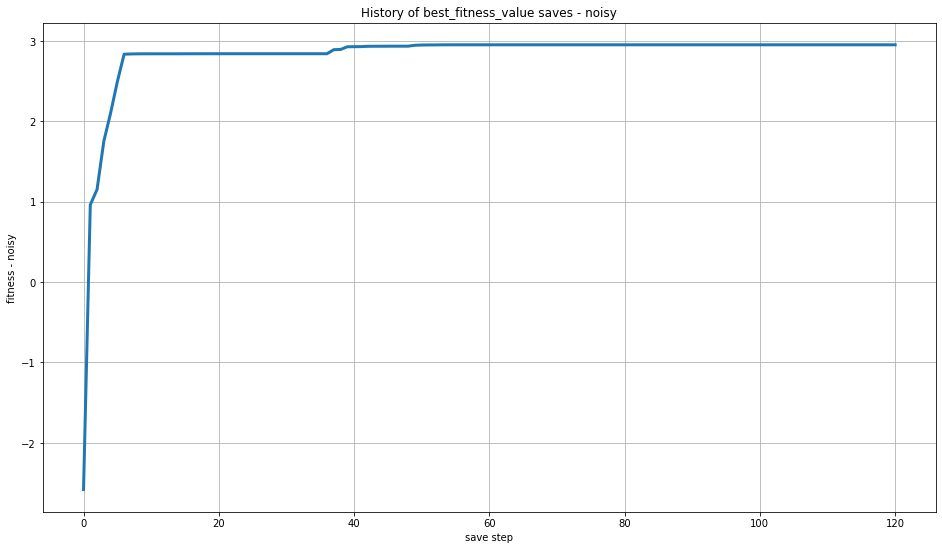

In [10]:
plt.figure(figsize=(16,9)) # Set the figure size
plt.plot(best_swarm_fitness_value_history,linewidth=3)
plt.grid()
# Label the plot
plt.xlabel("save step")
plt.ylabel("fitness - noisy")
plt.title("History of best_fitness_value saves - noisy")

### Average Fitness Values for Noisy Fitness Function with PSO

Text(0.5, 1.0, 'History of average fitness across the whole swarm - noisy')

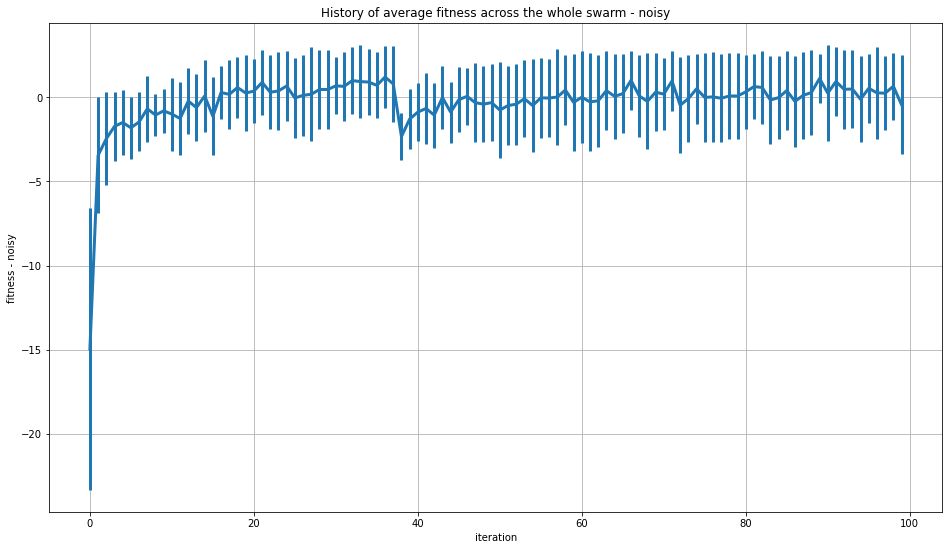

In [11]:
plt.figure(figsize=(16,9)) # Set the figure size
x = np.arange(max_iterations)
plt.errorbar(x,average_swarm_fitness,yerr=std_swarm_fitness, linewidth=3)
plt.grid()
# Label the plot
plt.xlabel("iteration")
plt.ylabel("fitness - noisy")
plt.title("History of average fitness across the whole swarm - noisy")

## 3.1 Observations [2D Fitness] [6 points]
1. What is the effect of having a few particles (less than 10) with very few algorithm iterations on the 2D fitness? [2 points]
2. What is the effect of having a many particles with high algorithm iterations on the 2D fitness? [2 points]
3. What are the effects of changing the w, phi_g, phi_p variables. What happens when you change the values? [2 points]

Investigate this by changing the parameters above and in the class.

3.1.1) With very few particles and iterations, the algorithm is not given the time to explore its search space and thus only marginal improvements in fitness are observed.

3.1.2) With a high number of particles and a lot of iterations to explore, the algorithm has a high probability of converging on a good solution, however this increases the run time of the algorithm as well as the computational intensity.

3.1.3) When changing w, if we increase this value too much, the algorithm takes significantly longer to converge, I suspect this is because particles over shoot the optimal point when the swarm gathers around the point. Furthermore, when we make this value too small, the algorithm converges faster but risks getting stuck on a local extrema.

when changing phi_g, it is observed that there is no convergence at all when we set this to 0, this is because the particles have no "awareness" of their surroundings and just wander aimlessly in the direction of their initial velocity. As we increase this parameter, convergence begins to happen faster, however less of the search space will be explored since each particles velocity becomes increasingly determined by the location of the swarms previous best position.

Lastly when changing phi_p, if we set this value too low we see a a quicker convergence however, this low values of phi_p don't allow to algorithm to explore as much of the search space and so one must find a balance between exploration and exploitation when setting this parameter.

## 3.2 Observations [Noisy Fitness] [9 points]
1. What is the effect of having a few particles (less than 10) with very few algorithm iterations on the Noisy fitness? [1 points]
2. What is the effect of having a few particles with high algorithm iterations on the Noisy fitness? [1 points]
3. What is the effect of having many particles with high algorithm iterations on the Noisy fitness? [1 points]
4. What parameter values are able to improve the performance of the algorithm without a heavy computational penality - Experiment with changing values for phi_g, phi_p and w {limiting them between 0 < 2}. **(a)Record your best values for each** after a few experiments. **(b)What are the effects on the best fitness and average firness plots** [6 points].

3.2.1) Much like with the 2D function the algorthim is not given enough resources to sufficiently explore the search region, and thus it only improves slightly, but remains far from an optimal point in most runs.

3.2.2) With few particles and high iterations, we observe convergence although it is relatively slow as much more of the search region needs to be explored per particle to find an optimal solution.

3.3.3) With both a large number of particles and a high number of iterations, we see rapid convergence (in terms of number of iterations) however it can get quite computationally intensive and could result in longer run times than algorthims with less particles/iterations for only a marginally better solution.

3.2.4a) Best Parameter Values: w = 0.75, phi_p = 0.1, phi_g = 1.8 

3.2.4b) By changing w from the default of 0.1 to 0.75 we see a slight decrease in convergence rate however our best fitness value is often better. We also observe a marginal improvement in the average fitness value, however it was noted that often when values were higher than 0.75 the average fitness value oscillated most likely because the particles were overshooting the optimal.

When experimenting with the phi_p parameter, 0 actually showed the fastest and most optimal solution, however this restricts the level of exploration that the algortihm conducts, and so I discarded 0 as an option. The next best value was around the 0.1 which was also the default value conveniently. This value showed fast convergence on the best value plot and also resulted in a higher average fitness for the swarm than other values. Lasetly, I also noticed that going higher than 0.1 did not have much of an effect on the performance of the algorithm.

Phi_g appeared to have the biggest effect on the performance of the algorithm, with a value of 1.8 I observed relatively fast convergence on the best fitness plot, however I also noticed that higher values often caused patches of huge variance in the average fitness of the swarm plot. I suspect this is because if a particle on the edge of the swarm finds a new best the entire swarm will gravitate rapidly to this new best, which could create a high velocity amoung particles, causing some to overshoot and explore some unsearched regions.